In [1]:
import pandas as pd
from seaborn import countplot
import numpy as np
from sklearn import model_selection
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
def weight(event):
    if event == 1:
        return -10
    elif event == 2:
        return -0.1
    elif event == 3:
        return 0.1
    elif event == 4:
        return 0.5
    return None

def class_value(pred1, pred2, pred3):
    return (~pred1) + 2 * (pred1 & (~pred2)) + 3 * (pred1 & pred2 & (~pred3)) + 4 * (pred1 & pred2 & pred3)

def pred(X_test):
    pred1 = model1.predict(X_test)
    pred2 = model2.predict(X_test)
    pred3 = model3.predict(X_test)
    return (~pred1) + 2 * (pred1 & (~pred2)) + 3 * (pred1 & pred2 & (~pred3)) + 4 * (pred1 & pred2 & pred3)

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1AHDxRu5tLjSVt9KR02MCz2x4MVYjvzrf'

In [5]:
fluff, id = link.split('=')
print (id)

1AHDxRu5tLjSVt9KR02MCz2x4MVYjvzrf


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train_dataset.csv')  
data = pd.read_csv('train_dataset.csv')
# Dataset is now stored in a Pandas Dataframe

In [0]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data.dropna(inplace=True)

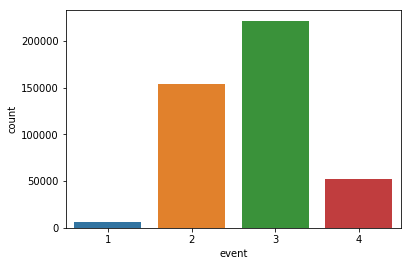

In [8]:
countplot('event', data=data)

In [9]:
data.event.value_counts()

3    221675
2    153885
4     51968
1      6184
Name: event, dtype: int64

In [0]:
X = data.drop('event', axis=1)
y = data.event

In [0]:

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, shuffle=True, stratify=y)

In [12]:
X_train.shape

(325284, 578)

In [13]:

X_train_OS, y_train_OS = RandomOverSampler().fit_resample(X_train, y_train)
X_train_OS.shape

(665024, 578)

In [0]:
%%time
ns = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

for n in ns:
    print(f"n={n}")
    del model1
    del model2
    del model3
    del ps
    del ans
    model1 = RandomForestClassifier(n)
    model2 = RandomForestClassifier(n)
    model3 = RandomForestClassifier(n)
    model1.fit(X_train_OS, y_train_OS > 1)
    model2.fit(X_train_OS, y_train_OS > 2)
    model3.fit(X_train_OS, y_train_OS > 3)
    print("Binary scores:", accuracy_score(model1.predict(X_test), y_test > 1), accuracy_score(model2.predict(X_test), y_test > 2), accuracy_score(model3.predict(X_test), y_test > 3))
    print("Multiclass score:", accuracy_score(pred(X_test), class_value(y_test > 1, y_test > 2, y_test > 3)))
    ps = np.array([1 - model1.predict_proba(X_test)[:, 1], model1.predict_proba(X_test)[:, 1] - model2.predict_proba(X_test)[:, 1],
                   model2.predict_proba(X_test)[:, 1] - model3.predict_proba(X_test)[:, 1], model3.predict_proba(X_test)[:, 1]])
    ans = np.tanh(-10 * ps[0] - 0.1 * ps[1] + 0.1 * ps[2] + 0.5 * ps[3])
    print("Tanh answer:", sum([weight(event) * answer for event, answer in zip(y_test, ans)]) / len(ans))
    ans = np.sign(-10 * ps[0] - 0.1 * ps[1] + 0.1 * ps[2] + 0.5 * ps[3])
    print("Signum answer:", sum([weight(event) * answer for event, answer in zip(y_test, ans)]) / len(ans))
    
# WRONG METRIC CALCULATION, IT HAS TO BE DIVIDED BY SUM OF ABSOLUTE WEIGHTS
# also, i forgot there is a way to use several cores

In [0]:
%%time
ns = [50, 100, 150]
anses = []

for n in ns:
    print(f"n={n}")
    model1 = RandomForestClassifier(n, n_jobs=-1)
    model2 = RandomForestClassifier(n, n_jobs=-1)
    model3 = RandomForestClassifier(n, n_jobs=-1)
    model1.fit(X_train_OS, y_train_OS > 1)
    model2.fit(X_train_OS, y_train_OS > 2)
    model3.fit(X_train_OS, y_train_OS > 3)
    print("Binary scores:", accuracy_score(model1.predict(X_test), y_test > 1), accuracy_score(model2.predict(X_test), y_test > 2), accuracy_score(model3.predict(X_test), y_test > 3))
    print("Multiclass score:", accuracy_score(pred(X_test), class_value(y_test > 1, y_test > 2, y_test > 3)))
    ps = np.array([1 - model1.predict_proba(X_test)[:, 1], model1.predict_proba(X_test)[:, 1] - model2.predict_proba(X_test)[:, 1],
                   model2.predict_proba(X_test)[:, 1] - model3.predict_proba(X_test)[:, 1], model3.predict_proba(X_test)[:, 1]])
    ans = np.tanh(-10 * ps[0] - 0.1 * ps[1] + 0.1 * ps[2] + 0.5 * ps[3])
    print("Tanh answer:", sum([weight(event) * answer for event, answer in zip(y_test, ans)]) / sum([abs(weight(event)) for event in y_test]))
    ans = np.sign(-10 * ps[0] - 0.1 * ps[1] + 0.1 * ps[2] + 0.5 * ps[3])
    print("Signum answer:", sum([weight(event) * answer for event, answer in zip(y_test, ans)]) / sum([abs(weight(event)) for event in y_test]))
    del model1
    del model2
    del model3
    del ps
    del ans

n=10
Binary scores: 0.9868576382484229 0.6190559634042867 0.8884328771166119
Multiclass score: 0.5357195558342863
Tanh answer: 0.15913204167991005
Signum answer: 0.14785452225259102
n=20
Binary scores: 0.987300328328476 0.640341978086841 0.8923156380270779
Multiclass score: 0.5525141107463017
Tanh answer: 0.17568358169225134
Signum answer: 0.21332269899544293
n=40
Binary scores: 0.9873187737484782 0.6513907846681669 0.8940956210572915
Multiclass score: 0.5608329951673
Tanh answer: 0.17786456444849183
Signum answer: 0.2612474078805129
n=60
Binary scores: 0.9873095510384772 0.6553381045486406 0.8943815250673258
Multiclass score: 0.5641623934776995
Tanh answer: 0.18232431516675943
Signum answer: 0.30056787366459
n=90
Binary scores: 0.9874017781384882 0.6573302099088796 0.8945198657173424
Multiclass score: 0.5652598959678312
Tanh answer: 0.17992921080666552
Signum answer: 0.3051204338815423
n=120
Binary scores: 0.9873556645884827 0.6584277123990113 0.894482974877338
Multiclass score: 0.565

In [0]:
%%time
ns = [150]

for n in ns:
    print(f"n={n}")
    model1 = RandomForestClassifier(n, n_jobs=-1)
    model2 = RandomForestClassifier(n, n_jobs=-1)
    model3 = RandomForestClassifier(n, n_jobs=-1)
    model1.fit(X_train_OS, y_train_OS > 1)
    model2.fit(X_train_OS, y_train_OS > 2)
    model3.fit(X_train_OS, y_train_OS > 3)
    print("Binary scores:", accuracy_score(model1.predict(X_test), y_test > 1), accuracy_score(model2.predict(X_test), y_test > 2), accuracy_score(model3.predict(X_test), y_test > 3))
    print("Multiclass score:", accuracy_score(pred(X_test), class_value(y_test > 1, y_test > 2, y_test > 3)))
    ps = np.array([1 - model1.predict_proba(X_test)[:, 1], model1.predict_proba(X_test)[:, 1] - model2.predict_proba(X_test)[:, 1],
                   model2.predict_proba(X_test)[:, 1] - model3.predict_proba(X_test)[:, 1], model3.predict_proba(X_test)[:, 1]])
    ans = np.tanh(-10 * ps[0] - 0.1 * ps[1] + 0.1 * ps[2] + 0.5 * ps[3])
    print("Tanh answer:", sum([weight(event) * answer for event, answer in zip(y_test, ans)]) / sum([abs(weight(event)) for event in y_test]))
    ans = np.sign(-10 * ps[0] - 0.1 * ps[1] + 0.1 * ps[2] + 0.5 * ps[3])
    print("Signum answer:", sum([weight(event) * answer for event, answer in zip(y_test, ans)]) / sum([abs(weight(event)) for event in y_test]))
    del model1
    del model2
    del model3
    del ps
    del ans

In [14]:
n = 100
print(f"n={n}")
model1 = RandomForestClassifier(n, n_jobs=-1)
model2 = RandomForestClassifier(n, n_jobs=-1)
model3 = RandomForestClassifier(n, n_jobs=-1)
model1.fit(X_train_OS, y_train_OS > 1)
print("1 fit successful")
model2.fit(X_train_OS, y_train_OS > 2)
print("2 fit successful")
model3.fit(X_train_OS, y_train_OS > 3)
print("3 fit successful")
print("Binary scores:", accuracy_score(model1.predict(X_test), y_test > 1), accuracy_score(model2.predict(X_test), y_test > 2), accuracy_score(model3.predict(X_test), y_test > 3))
print("Multiclass score:", accuracy_score(pred(X_test), class_value(y_test > 1, y_test > 2, y_test > 3)))
ps = np.array([1 - model1.predict_proba(X_test)[:, 1], model1.predict_proba(X_test)[:, 1] - model2.predict_proba(X_test)[:, 1],
               model2.predict_proba(X_test)[:, 1] - model3.predict_proba(X_test)[:, 1], model3.predict_proba(X_test)[:, 1]])
ans = np.tanh(-10 * ps[0] - 0.1 * ps[1] + 0.1 * ps[2] + 0.5 * ps[3])
print("Tanh answer:", sum([weight(event) * answer for event, answer in zip(y_test, ans)]) / sum([abs(weight(event)) for event in y_test]))
ans = np.sign(-10 * ps[0] - 0.1 * ps[1] + 0.1 * ps[2] + 0.5 * ps[3])
print("Signum answer:", sum([weight(event) * answer for event, answer in zip(y_test, ans)]) / sum([abs(weight(event)) for event in y_test]))

n=100
1 fit successful
2 fit successful
3 fit successful
Binary scores: 0.9875677869185081 0.6582985944589959 0.8954605821374553
Multiclass score: 0.5666433024679972
Tanh answer: 0.1819558493922317
Signum answer: 0.3053341840809731


In [0]:
del data
del X
del y
del X_train_OS
del y_train_OS

In [16]:
model1

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [17]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link = 'https://drive.google.com/open?id=1h9zZM-wclbjIDWLIvSYtMNpot7rMDPUR'
fluff, id = link.split('=')
print (id)
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('test_dataset.csv')  
data = pd.read_csv('test_dataset.csv')
# Dataset is now stored in a Pandas Dataframe

1h9zZM-wclbjIDWLIvSYtMNpot7rMDPUR


In [18]:
data.head()

,Unnamed: 0,answer_id,age,full_years,gender,product_0_CLS,product_0_NaN,product_0_UTL,product_1_CLS,product_1_NaN,product_1_OPN,product_1_UTL,product_2_CLS,product_2_NaN,product_2_OPN,product_2_UTL,product_3_CLS,product_3_NaN,product_3_UTL,product_4_CLS,product_4_NaN,product_4_OPN,product_4_UTL,product_5_CLS,product_5_NaN,product_5_OPN,product_5_UTL,product_6_CLS,product_6_NaN,product_6_OPN,product_6_UTL,marital_status_cd_CIV,marital_status_cd_DIV,marital_status_cd_DLW,marital_status_cd_MAR,marital_status_cd_NaN,marital_status_cd_UNM,marital_status_cd_WID,job_position_cd_1,job_position_cd_2,...,coord260,coord261,coord262,coord263,coord264,coord265,coord266,coord267,coord268,coord269,coord270,coord271,coord272,coord273,coord274,coord275,coord276,coord277,coord278,coord279,coord280,coord281,coord282,coord283,coord284,coord285,coord286,coord287,coord288,coord289,coord290,coord291,coord292,coord293,coord294,coord295,coord296,coord297,coord298,coord299
0,0,0,25.0,2.0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0.005123,0.024197,-0.058282,0.007024,-0.039734,0.029438,-0.006146,-0.028294,-0.040146,0.007150,0.000429,0.029343,0.008134,0.036950,-0.009188,0.056968,0.052076,0.015773,-0.007375,0.007010,-0.049727,-0.026250,-0.011470,-0.028620,-0.002693,0.006334,-0.004347,-0.054856,0.011038,0.037431,0.009240,0.020367,0.003448,0.011735,-0.025896,-0.040107,0.023583,0.030698,-0.022525,0.002432
1,1,1,25.0,2.0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,...,-0.024783,0.021015,-0.050751,0.013025,-0.030274,0.019388,0.007604,-0.033712,-0.026759,-0.028097,0.025944,0.028333,0.019599,0.064329,-0.011714,0.036990,0.026414,0.002427,-0.003240,-0.023047,-0.037153,-0.009166,-0.018715,-0.013719,-0.003098,0.011552,-0.008348,-0.035734,-0.013084,-0.004529,0.010601,-0.000924,-0.015405,0.022680,-0.031062,-0.022008,0.029890,0.006448,-0.010427,0.010316
2,2,2,25.0,1.0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,-0.015661,0.038601,-0.066301,-0.000626,-0.025590,0.023087,0.005542,-0.025718,-0.001172,0.020753,0.013150,0.041343,0.013823,0.017250,-0.014985,0.005705,0.015268,0.015882,0.044541,0.022796,-0.051697,-0.030849,-0.019309,-0.001380,-0.005866,0.000532,0.003278,0.022488,0.019980,0.024087,-0.014660,0.020797,-0.008639,0.005238,-0.005248,-0.014520,0.047162,0.001721,-0.048800,0.012543
3,3,3,30.0,1.0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,-0.022959,0.017009,-0.062764,-0.014338,-0.033903,0.016967,-0.020229,-0.011473,-0.001042,-0.012925,0.022262,0.028878,-0.000129,0.028645,0.023044,0.019966,-0.003169,0.023608,0.029418,0.006427,-0.018562,0.001513,0.007357,-0.006433,0.029866,-0.006083,-0.013533,0.009892,-0.012969,0.035268,-0.000867,0.003601,-0.003817,-0.015421,-0.032705,-0.017620,0.037112,0.005482,-0.051731,-0.008525
4,4,4,30.0,7.0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,...,-0.008125,0.004922,-0.048499,0.020274,-0.039889,0.051245,-0.007227,-0.037216,-0.029321,-0.008985,0.007017,0.021847,0.021325,0.036199,-0.006801,0.056920,0.052238,0.018618,-0.015878,0.009901,-0.037796,-0.025908,-0.004817,-0.031321,0.000944,-0.002224,-0.021467,-0.027055,-0.004520,0.040990,0.008177,0.017992,-0.002303,0.007081,-0.033907,-0.047662,0.026817,0.030919,-0.018454,0.025909


In [0]:
data.drop('Unnamed: 0', axis=1, inplace=True)
answer_ids = data.answer_id
X = data.drop('answer_id', axis=1)

In [20]:
data.dropna().shape

(169838, 579)

In [21]:
data.fillna(data.mean(), inplace=True)
data.dropna().shape

(172049, 579)

In [0]:
answer_ids = data.answer_id
X = data.drop('answer_id', axis=1)

In [0]:
ps = np.array([1 - model1.predict_proba(X)[:, 1], model1.predict_proba(X)[:, 1] - model2.predict_proba(X)[:, 1],
               model2.predict_proba(X)[:, 1] - model3.predict_proba(X)[:, 1], model3.predict_proba(X)[:, 1]])
th_ans = np.tanh(-10 * ps[0] - 0.1 * ps[1] + 0.1 * ps[2] + 0.5 * ps[3])
sgn_ans = np.sign(-10 * ps[0] - 0.1 * ps[1] + 0.1 * ps[2] + 0.5 * ps[3])

In [0]:
answer_df = pd.DataFrame({'tanh': th_ans, 'sgn': sgn_ans}, index=answer_ids)

In [25]:
answer_df

,tanh,sgn
answer_id,,
0,-0.287648,-1.0
1,-0.063913,-1.0
2,0.063913,1.0
3,0.075854,1.0
4,0.000929,1.0
5,-0.117883,-1.0
6,0.024395,1.0
7,0.008000,1.0
8,0.077180,1.0


In [26]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [0]:
answer_df.to_csv('answer_RF_100trees.csv')
!cp answer_RF_250trees.csv drive/My\ Drive/

In [0]:
!cp answer_RF_100trees.csv drive/My\ Drive/